Fourier series for $e^x$ on $[-\pi,\pi)$:

In [55]:
%%latex

\begin{align*}
    a_n &= \frac{1}{\pi} \int_{-\pi}^\pi dx e^x \cos(nx) \\
    &= \frac{1}{\pi} \int_{-\pi}^\pi dx e^x \frac{e^{inx} + e^{-inx}}{2} \\
    &= \frac{1}{2\pi  } \int_{-\pi}^\pi dx \left[ e^{x(1+in)} + e^{x(1-in)}\right]\\
    &= \frac{1}{2\pi  } \left[ \frac{e^{x(1+in)}}{1+in} 
                               + \frac{e^{x(1-in)}}{1-in}\right]^\pi_{-\pi} \\
    &= \frac{1}{2\pi }\left[ \frac{e^{\pi(1+in)}}{1+in} 
                             + \frac{e^{\pi(1-in)}}{1-in} 
                             - \frac{e^{-\pi(1+in)}}{1+in} 
                             - \frac{e^{-\pi(1-in)}}{1-in}
                            \right] \\
    &= \frac{1}{2\pi } \left[ \frac{(-1)^n (e^\pi - e^{-\pi})}{1+in}
                               + \frac{(-1)^n e^\pi - e^{-\pi}}{1-in}
                              \right] \\
    &= \frac{(-1)^n \sinh(\pi)}{\pi  } \frac{(1+in) + (1-in)}{(1+in)(1-in)} \\
    &= \frac{2(-1)^n \sinh(\pi)}{\pi(1+n^2)}
\end{align*}


<IPython.core.display.Latex object>

In [56]:
%%latex

\begin{align*}
    b_n &= \frac{1}{\pi} \int_{-\pi}^\pi dx e^x \sin(nx) \\
    &= \frac{1}{\pi} \int_{-\pi}^\pi dx e^x \frac{e^{inx} - e^{-inx}}{2i} \\
    &= \frac{1}{2\pi i } \int_{-\pi}^\pi dx \left[ e^{x(1+in)} - e^{x(1-in)}\right]\\
    &= \frac{1}{2\pi i } \left[ \frac{e^{x(1+in)}}{1+in} 
                               - \frac{e^{x(1-in)}}{1-in}\right]^\pi_{-\pi} \\
    &= \frac{1}{2\pi i}\left[ \frac{e^{\pi(1+in)}}{1+in} 
                             - \frac{e^{\pi(1-in)}}{1-in} 
                             - \frac{e^{-\pi(1+in)}}{1+in} 
                             + \frac{e^{-\pi(1-in)}}{1-in}
                            \right] \\
    &= \frac{1}{2\pi i } \left[ \frac{(-1)^n (e^\pi - e^{-\pi})}{1+in}
                               - \frac{(-1)^n e^\pi - e^{-\pi}}{1-in}
                              \right] \\
    &= \frac{(-1)^n \sinh(\pi)}{\pi i } \frac{(1-in) - (1+in)}{(1+in)(1-in)} \\
    &= -\frac{2(-1)^n \sinh(\pi) n}{\pi(1+n^2)}
\end{align*}

<IPython.core.display.Latex object>

In [1]:
%matplotlib widget 
import matplotlib.pyplot as plt
import numpy as np
from math import pi, sinh, sin, cos
import ipywidgets as widgets
from ipywidgets import interact

def fourier_approx(x, nmax):
    result = 0
    for n in range(0, nmax+1):
        an = 2 * (-1)**n * sinh(pi) / (pi * (1+n**2))
        bn = -2 * (-1)**n * sinh(pi) * n / (pi * (1+n**2))
        if n==0:
            result += an/2
        else:
            result += an * cos(n*x) + bn * sin(n*x)
    return result

def fseries_plot(nmax):
    plt.clf()
    xvals = np.linspace(-pi, pi, 500)
    yvals = np.array([fourier_approx(x, nmax) for x in xvals])
    plt.plot(xvals, yvals)

    true_yvals = np.exp(xvals)
    plt.plot(xvals, true_yvals)

    plt.legend([r'Fourier series, $n_{max}=$'+f'{nmax}', r'$e^x$'])
    plt.xlabel(r'$x$')
    plt.show()

interact(fseries_plot, nmax=widgets.IntSlider(
    value=1, min=0, max=100, 
    description=r'$n_{max}$'
    )
        )


interactive(children=(IntSlider(value=1, description='$n_{max}$'), Output()), _dom_classes=('widget-interact',…

<function __main__.fseries_plot(nmax)>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
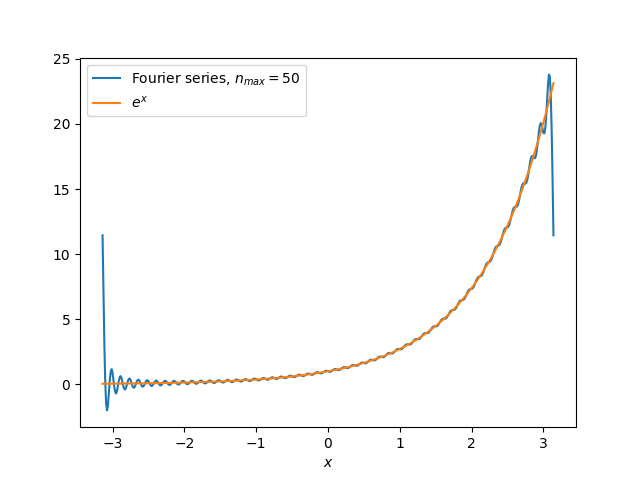

In [2]:
fseries_plot(50)